In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt


eps = 13 # dielectric constant of waveguide
w = 1.2 # width of waveguide
r = 0.36 # radius of cylinder

# size of cell in x, y, z direction
sx, sy, sz = 1, 1, 10
dpml = 1 # PML thickness (y direction only)

pad = 4
w = 1

wvg_xcen = 0.5 * (sx - w - 2 * pad)
wvg_ycen = 0.5 * (sy - w - 2 * pad)
wvg_zcen = -0.5 * (sx - w - 2 * pad)

# create a cell (source size must be smaller than cell)
cell = mp.Vector3(sx, sy, sz) 

#absorbing boundaries surrounding the commputational cell
pml_layers = [mp.PML(dpml, direction = mp.Z)] # 
c = mp.Cylinder(radius = r, height = 1, material = mp.Medium(epsilon = eps))
b = mp.Block(size = mp.Vector3(10,10,10))
# geometry are combined using append function
# later geometry take precedence overr earlier objects
geometry = [b]
geometry.append(c)

resolution = 10 

In [2]:
# determine the frequency range to investigate

fcen = 0.15 # pulse center frequency
df = 0.1 # pulse frequency width
src = [mp.Source(mp.GaussianSource(fcen, fwidth = df),
                 component = mp.Ex, # bumingbai
                 center = mp.Vector3(0, 0, -0.5 * sz + dpml + 0.5),
                 size = mp.Vector3(sx,sy,0))]

In [3]:
# what does direction mean?
# what about x and z? 
#sym = [mp.Mirror(direction = mp.Y, phase = -1)]
sim = mp.Simulation(cell_size = cell,
                    geometry = geometry,
                    sources = src,
                    #symmetries = sym, # xuyaoma?
                    resolution = resolution)

In [4]:
sim.k_point = mp.Vector3(0, 0, 0)

In [5]:
nfreq = 100 # number of frequencies at which to compute flux

# transmitted flux
tran_fr = mp.FluxRegion(center = mp.Vector3(0, 0, 0.5 * sz - dpml - 0.2),
                         size = mp.Vector3(1, 1, 0))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)
pt = mp.Vector3(0, 0, 0.5 * sz - dpml - 0.5)

In [54]:
sim.run(until_after_sources = 500)
straight_tran_flux = mp.get_fluxes(tran)

-----------
Initializing structure...
Meep progress: 332.45000000000005/600.0 = 55.4% done in 4.0s, 3.2s to go
run 0 finished at t = 600.0 (12000 timesteps)


In [55]:
#sim.run(until_after_sources = mp.stop_when_fields_decayed(10, mp.Ex, pt, 1e-2))
#straight_tran_flux = mp.get_fluxes(tran)

In [56]:
sim.reset_meep()

geometry = [b]

sim = mp.Simulation(cell_size = cell,
                    geometry = geometry,
                    sources = src,
                    #symmetries = sym, # xuyaoma?
                    resolution = resolution)

tran_fr = mp.FluxRegion(center = mp.Vector3(0, 0, 0.5 * sz - dpml - 0.2),
                         size = mp.Vector3(1, 1, 0))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)
pt = mp.Vector3(0, 0, 0.5 * sz - dpml - 0.5)

#sim.run(until_after_sources = mp.stop_when_fields_decayed(50, mp.Ex, pt, 1e-3))
sim.run(until_after_sources = 500)
bend_tran_flux = mp.get_fluxes(tran)
flux_freqs = mp.get_flux_freqs(tran)

-----------
Initializing structure...
run 0 finished at t = 600.0 (12000 timesteps)


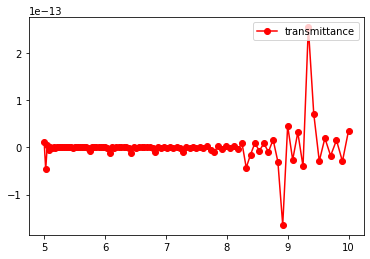

In [57]:
Ts = []
wl = []
for i in range(nfreq):
    if flux_freqs[i] == 0:
        continue
    Ts = np.append(Ts, bend_tran_flux[i]/straight_tran_flux[i])
    wl = np.append(wl, 1/flux_freqs[i])
if mp.am_master():
    plt.figure()
    plt.plot(wl, Ts, 'ro-', label = 'transmittance')
    #plt.axis([5.0, 10.0, 0, 1])
    plt.legend(loc = "upper right")
    plt.show()

In [32]:
Ts

array([-1.18782410e-02, -2.74960892e-02, -6.88187368e-04,  1.58771995e-02,
       -8.38946698e-03, -1.97023153e-03,  4.95474255e-04, -2.06856959e-03,
       -4.52815957e-03,  4.64093834e-02, -2.02972410e-03, -4.82151288e-03,
        1.65248486e-02, -1.35841080e-03, -3.06084308e-03,  5.08432017e-04,
        6.10500105e-03, -1.71796587e-02,  2.70751586e-03,  6.43879651e-03,
        1.22061640e-03,  2.32233902e-03,  7.35882164e-02, -3.21160936e-02,
       -3.73394295e-02,  2.70099935e-01,  1.22189571e-02, -5.46626509e-04,
       -6.70933205e-02,  6.82419890e-02, -8.06577838e-01, -1.05302765e+00,
       -1.13478163e+00, -1.13478163e+00, -1.05302765e+00, -8.06577838e-01,
        6.82419890e-02, -6.70933205e-02, -5.46626509e-04,  1.22189571e-02,
        2.70099935e-01, -3.73394295e-02, -3.21160936e-02,  7.35882164e-02,
        2.32233902e-03,  1.22061640e-03,  6.43879651e-03,  2.70751586e-03,
       -1.71796587e-02,  6.10500105e-03,  5.08432017e-04, -3.06084308e-03,
       -1.35841080e-03,  